In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt

#### Helper methods

In [2]:
def get_sim_data(sim_parent_folder, tp):
    
    posfilestring = sim_parent_folder + "/" + "Pos_" + str(tp).zfill(6) +".dat"
    posdata = np.loadtxt(posfilestring, str, "#", ",")
    
    posx = []
    posy = []
    
    for val in posdata:
        
        complex_pos = complex(val.replace('i', 'j'))
        xpos = [complex_pos.real]
        ypos = [complex_pos.imag]
        posx = np.append(posx, xpos)
        posy = np.append(posy, ypos)  
        
    positions = np.column_stack((posx, posy))
    
    return positions

### Without proliferation

In [4]:
parent_dir = 'no_prolif_timelapse'

phenotypes = ['Clustered', 'SpanningWClusters', 'Spanning', 'Individual']
labels = ['Clustered', 'Branching w/ Clusters', 'Branching', 'Individual']

cond_pairs_sml = [["Individual", "Spanning"], ["Individual", "Clustered"], ["Spanning", "Clustered"]]
label_pairs_sml = [["Individual", "Branching"], ["Individual", "Clustered"], ["Branching", "Clustered"]]

tpoints = np.arange(0, 200000+1000, 1000)
n_tpoints = len(tpoints)

removals = np.arange(0, 198+1, 1)
n_removals = len(removals)

scales = np.arange(0.2, 5+0.05, 0.05)
n_scales = len(scales)

rep_vals = np.arange(1, 10+1, 1)
n_reps = len(rep_vals)

#### Random removals

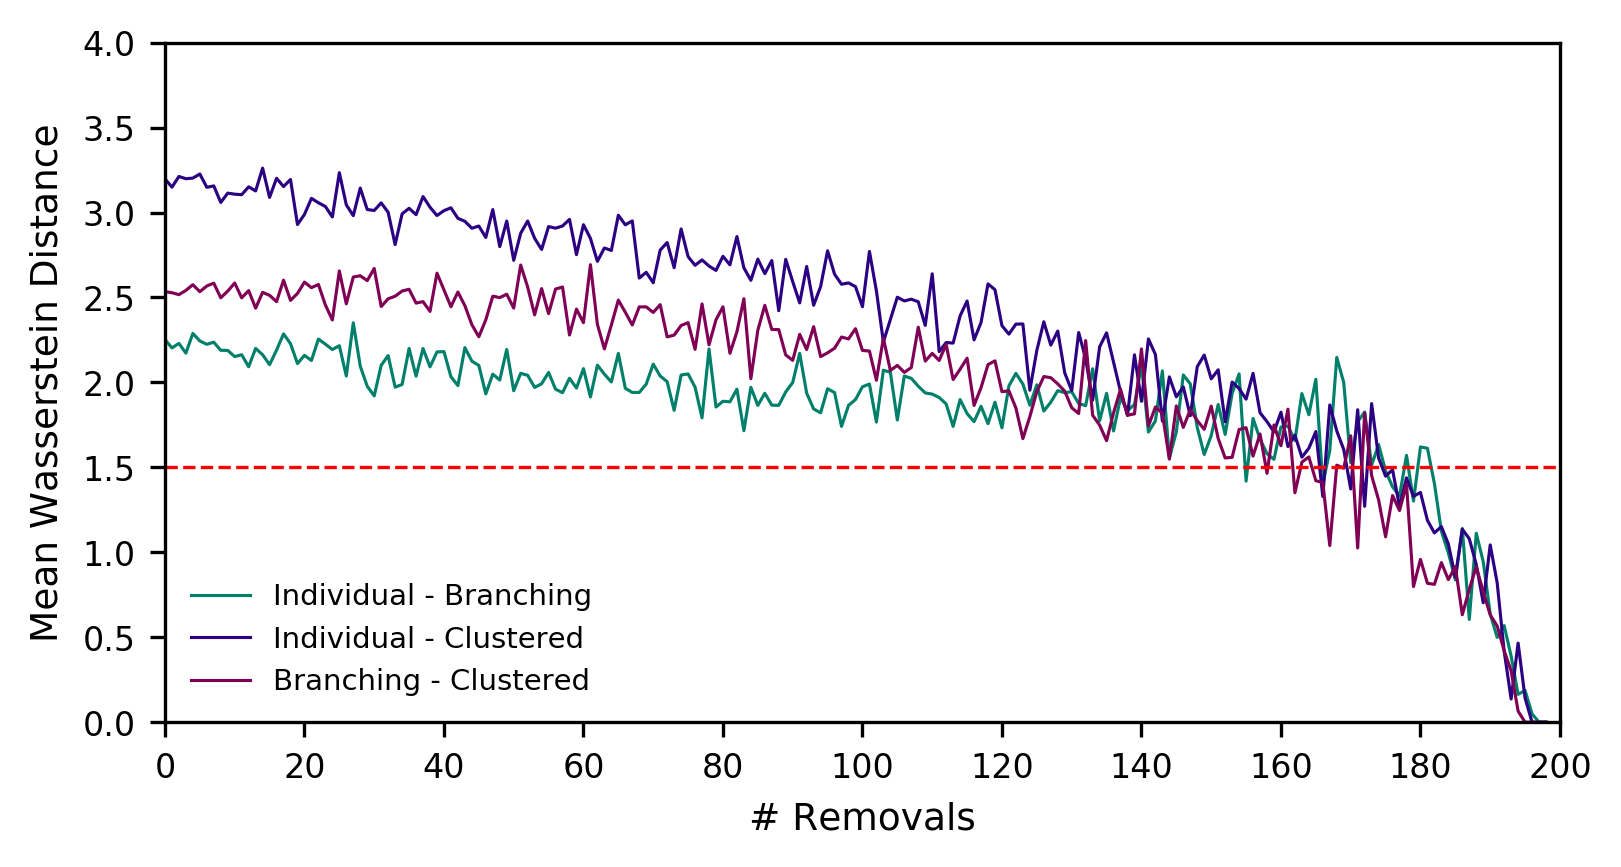

In [8]:
plt.figure(figsize=(6,3), dpi=300)

pair_idx = 0
for cond_pair in cond_pairs_sml:
    
    cond1 = cond_pair[0]
    cond2 = cond_pair[1]

    fname = "removal_wassdist_noprolif_" + cond1 + "_" + cond2 + ".npz"
    wass_data = np.load(fname)
    
    mean_wass_dist = wass_data["mean"]
    std_wass_dist = wass_data["std"]
    
    clr = ''
    if cond1 == 'Individual' and cond2 == 'Spanning':
        clr = '#00806b'
    elif cond1 == 'Individual' and cond2 == 'Clustered':
        clr = '#2b0082'
    elif cond1 == 'Spanning' and cond2 == 'Clustered':
        clr = '#800055'
    else:
        clr = 'yellow'

    plt.plot(removals, mean_wass_dist, color=clr, linewidth=0.75, 
             label = label_pairs_sml[pair_idx][0] + " - " + label_pairs_sml[pair_idx][1])
    
    wass_data.close()
    pair_idx += 1

threshold_val = 1.5
plt.plot([0, 200], [threshold_val, threshold_val], "red", linestyle="--", linewidth=0.8)
plt.xlim([0, 200])
plt.ylim([0, 4])
plt.xticks(np.arange(0, 200+20, 20), np.arange(0, 200+20, 20), fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc=3, fontsize=7, frameon=False)
plt.xlabel('# Removals', fontsize=9)
plt.ylabel('Mean Wasserstein Distance', fontsize=9)
plt.show()

#### Spatial scaling

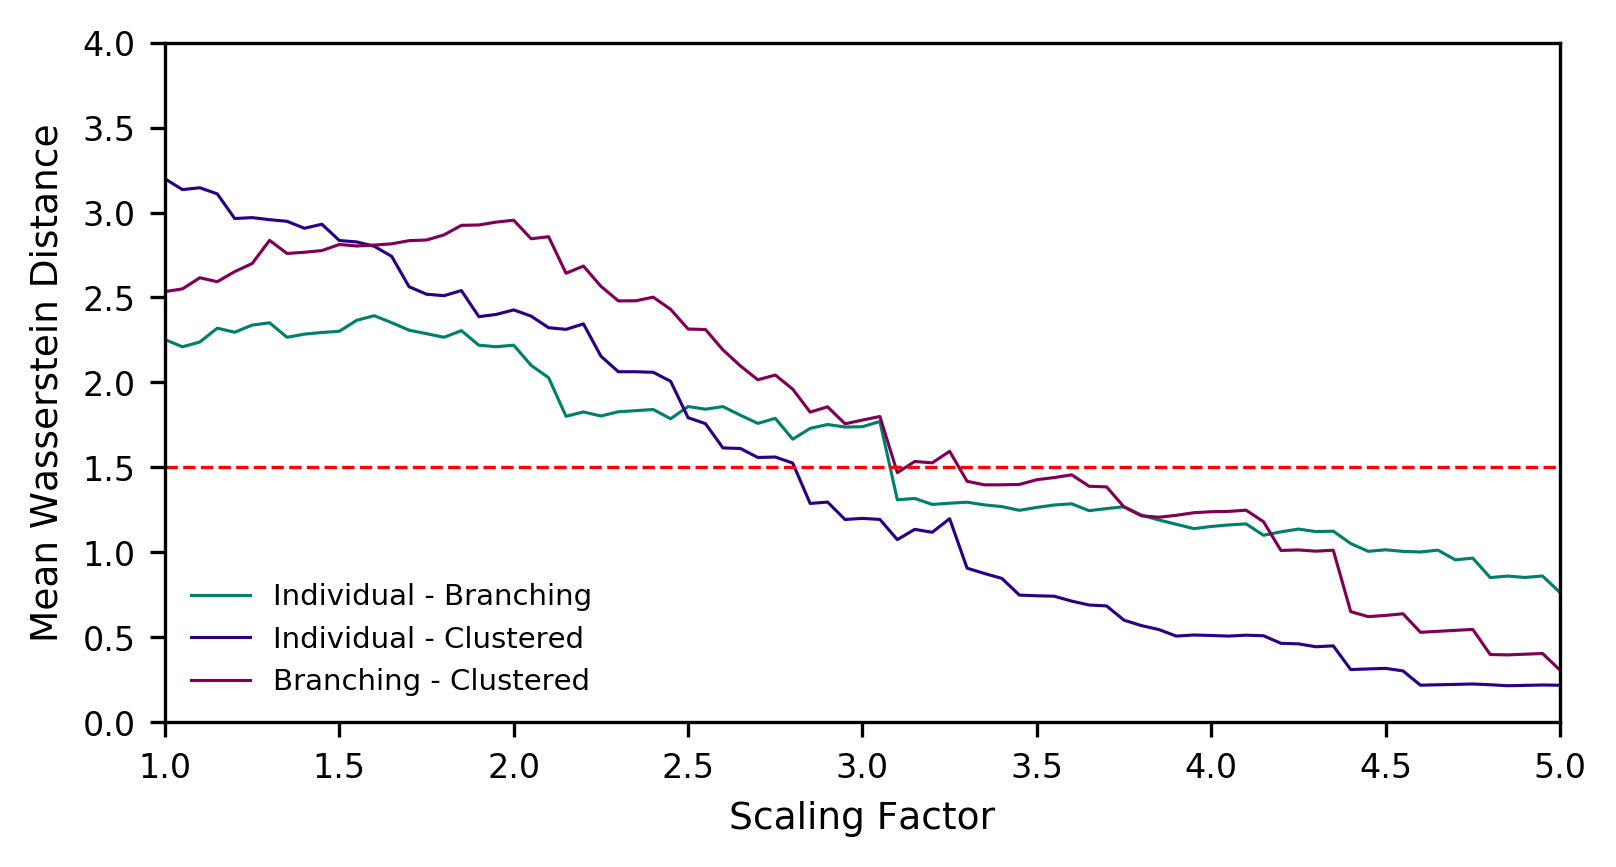

In [10]:
plt.figure(figsize=(6,3), dpi=300)

pair_idx = 0
for cond_pair in cond_pairs_sml:
    
    cond1 = cond_pair[0]
    cond2 = cond_pair[1]

    fname = "scale_wassdist_noprolif_" + cond1 + "_" + cond2 + ".npz"
    wass_data = np.load(fname)
    
    mean_wass_dist = wass_data["mean"]
    std_wass_dist = wass_data["std"]
    
    clr = ''
    if cond1 == 'Individual' and cond2 == 'Spanning':
        clr = '#00806b'
    elif cond1 == 'Individual' and cond2 == 'Clustered':
        clr = '#2b0082'
    elif cond1 == 'Spanning' and cond2 == 'Clustered':
        clr = '#800055'
    else:
        clr = 'yellow'

    plt.plot(scales, mean_wass_dist, color=clr, linewidth=0.75, 
             label = label_pairs_sml[pair_idx][0] + " - " + label_pairs_sml[pair_idx][1])
    
    wass_data.close()
    pair_idx += 1

threshold_val = 1.5
plt.plot([1, max(scales)], [threshold_val, threshold_val], "red", linestyle="--", linewidth=0.8)
plt.xlim([1, max(scales)])
plt.ylim([0, 4])
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.legend(loc=3, fontsize=7, frameon=False)
plt.xlabel('Scaling Factor', fontsize=9)
plt.ylabel('Mean Wasserstein Distance', fontsize=9)
plt.show()

#### Timelapse

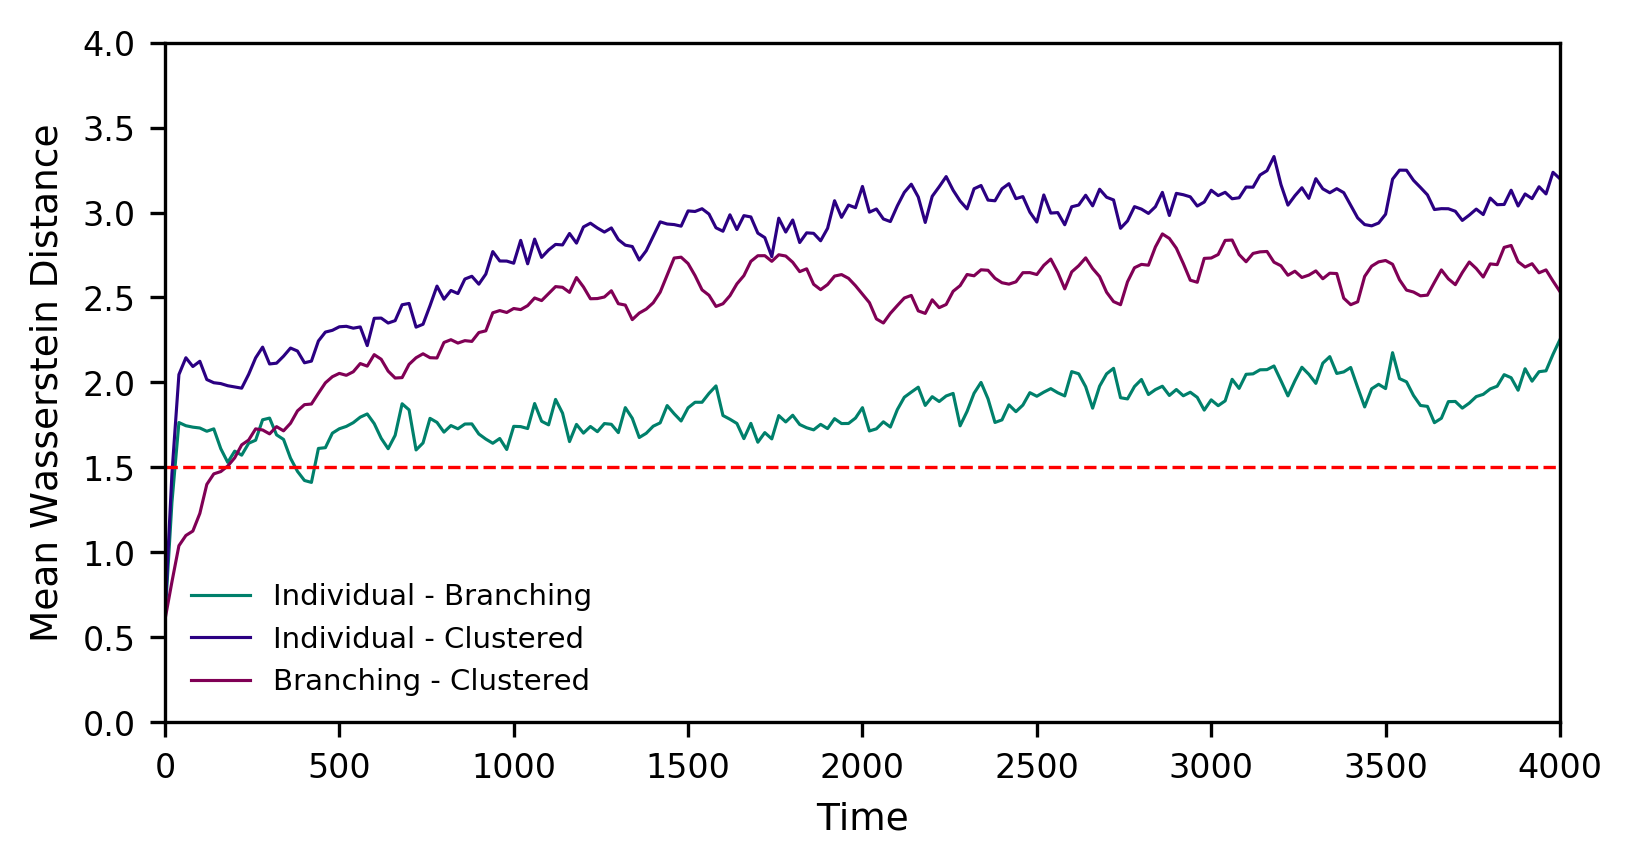

In [12]:
plt.figure(figsize=(6,3), dpi=300)

pair_idx = 0
for cond_pair in cond_pairs_sml:
    
    cond1 = cond_pair[0]
    cond2 = cond_pair[1]

    fname = "timelapse_wassdist_noprolif_" + cond1 + "_" + cond2 + ".npz"
    wass_data = np.load(fname)
    
    mean_wass_dist = wass_data["mean"]
    std_wass_dist = wass_data["std"]
    
    clr = ''
    if cond1 == 'Individual' and cond2 == 'Spanning':
        clr = '#00806b'
    elif cond1 == 'Individual' and cond2 == 'Clustered':
        clr = '#2b0082'
    elif cond1 == 'Spanning' and cond2 == 'Clustered':
        clr = '#800055'
    else:
        clr = 'yellow'

    plt.plot(tpoints*0.02, mean_wass_dist, color=clr, linewidth=0.75, 
             label = label_pairs_sml[pair_idx][0] + " - " + label_pairs_sml[pair_idx][1])
    
    wass_data.close()
    pair_idx += 1

threshold_val = 1.5
plt.plot([0, max(tpoints)*0.02], [threshold_val, threshold_val], "red", linestyle="--", linewidth=0.8)
plt.xlim([0, max(tpoints)*0.02])
plt.ylim([0, 4])
plt.yticks(fontsize=8)
plt.xticks(np.arange(0, 4000+500, 500), np.arange(0, 4000+500, 500), fontsize=8)
plt.legend(loc=3, fontsize=7, frameon=False)
plt.xlabel('Time', fontsize=9)
plt.ylabel('Mean Wasserstein Distance', fontsize=9)
plt.show()

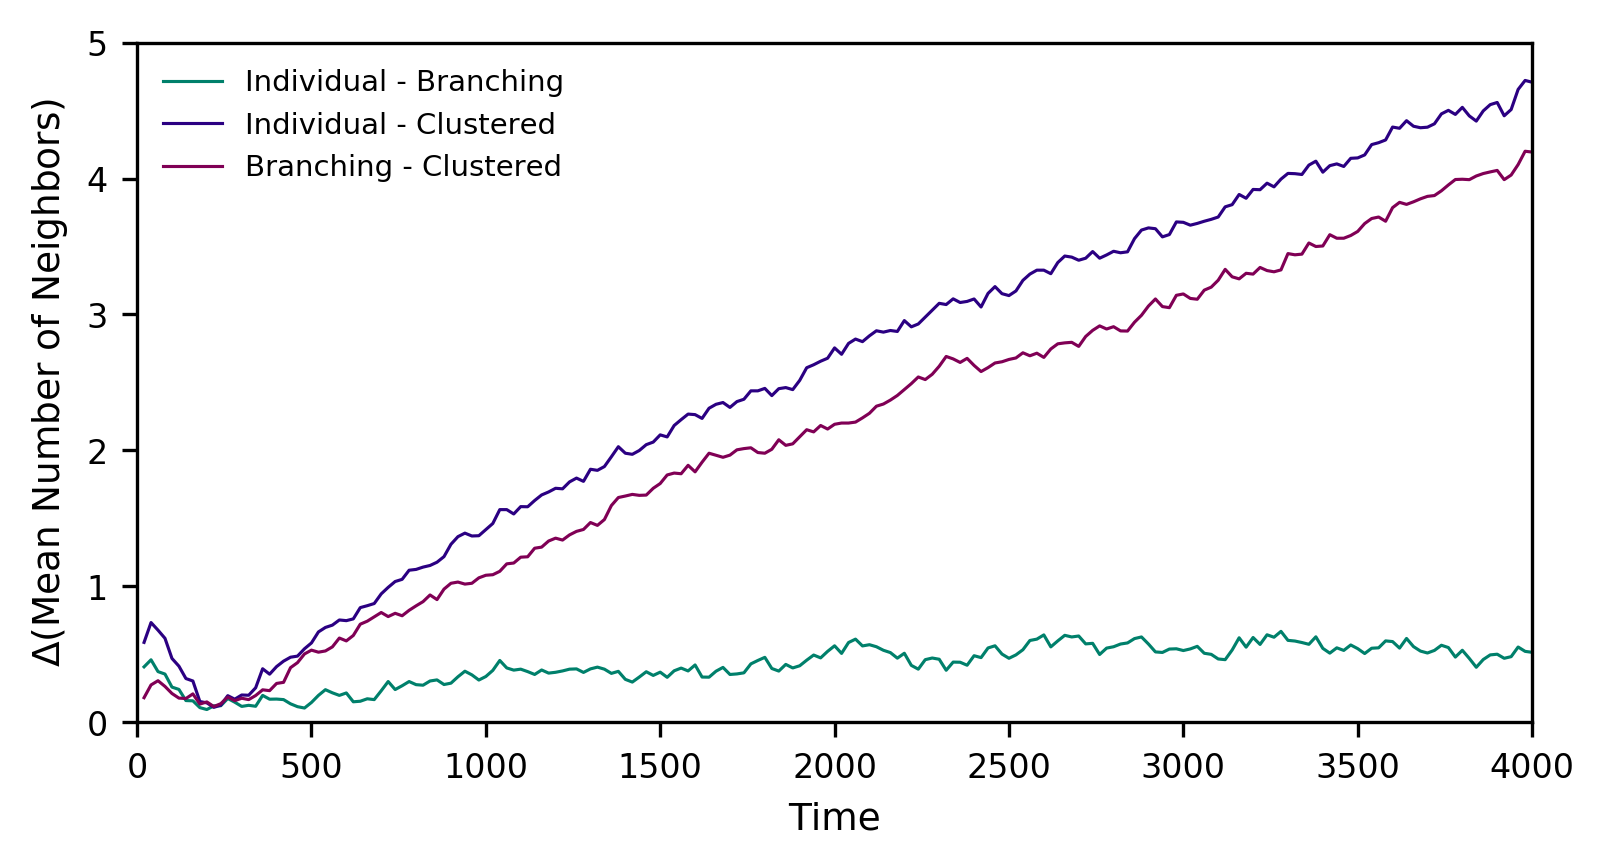

In [16]:
plt.figure(figsize=(6,3), dpi=300)

pair_idx = 0
for cond_pair in cond_pairs_sml:
    
    cond1 = cond_pair[0]
    cond2 = cond_pair[1]
    
    delta_density_per_rep = np.zeros((n_reps, n_tpoints))
    
    for rep in rep_vals:
        
        n_t = 0
        
        for itr in tpoints:
            
            nbd_file = parent_dir + os.sep + cond1 + '_' + repr(rep) + '_rep' + os.sep + 'Neighbors_' + repr(itr).zfill(6) + '.dat'
            infile = open(nbd_file, 'r')
            contents = infile.read().strip().split()
            
            avg_neighbors_cond1 = 0.0
            for num_neighbors in contents:
                avg_neighbors_cond1 += float(num_neighbors)
            avg_neighbors_cond1 = avg_neighbors_cond1/len(contents)
            
            nbd_file = parent_dir + os.sep + cond2 + '_' + repr(rep) + '_rep' + os.sep + 'Neighbors_' + repr(itr).zfill(6) + '.dat'
            infile = open(nbd_file, 'r')
            contents = infile.read().strip().split()
            
            avg_neighbors_cond2 = 0.0
            for num_neighbors in contents:
                avg_neighbors_cond2 += float(num_neighbors)
            avg_neighbors_cond2 = avg_neighbors_cond2/len(contents)
            
            delta_density_per_rep[rep-1, n_t] = abs(avg_neighbors_cond1 - avg_neighbors_cond2)
            
            n_t += 1
            
    avg_density_diff = np.mean(delta_density_per_rep, axis=0)
    std_density_diff = np.std(delta_density_per_rep, axis=0)
    
    clr = ''
    if cond1 == 'Individual' and cond2 == 'Spanning':
        clr = '#00806b'
    elif cond1 == 'Individual' and cond2 == 'Clustered':
        clr = '#2b0082'
    elif cond1 == 'Spanning' and cond2 == 'Clustered':
        clr = '#800055'
    else:
        clr = 'yellow'
    
    plt.plot(tpoints[1:]*0.02, avg_density_diff[1:], color=clr, linewidth=0.75,
            label = label_pairs_sml[pair_idx][0] + " - " + label_pairs_sml[pair_idx][1])
    
    pair_idx += 1

plt.xlim([1, max(tpoints)*0.02])
plt.ylim([0, 5])
plt.legend(loc=2, fontsize=7, frameon=False)
plt.yticks(fontsize=8)
plt.xticks(np.arange(0, 4000+500, 500), np.arange(0, 4000+500, 500), fontsize=8)
plt.xlabel('Time', fontsize=9)
plt.ylabel('$\Delta$(Mean Number of Neighbors)', fontsize=9)
plt.show()

### With proliferation enabled

In [26]:
parent_dir = 'prolif_timelapse'

phenotypes = ['Clustered', 'SpanningWClusters', 'Spanning']
labels = ['Clustered', 'Branching w/ Clusters', 'Branching']

cond_pairs_sml = [["Spanning", "Clustered"]]
label_pairs_sml = [["Branching", "Clustered"]]

tpoints = np.arange(0, 200000+1000, 1000)
n_tpoints = len(tpoints)

removals = np.arange(0, 180+1, 1)
n_removals = len(removals)

scales = np.arange(0.2, 10+0.05, 0.05)
n_scales = len(scales)

rep_vals = np.arange(1, 10+1, 1)
n_reps = len(rep_vals)

#### Random removals

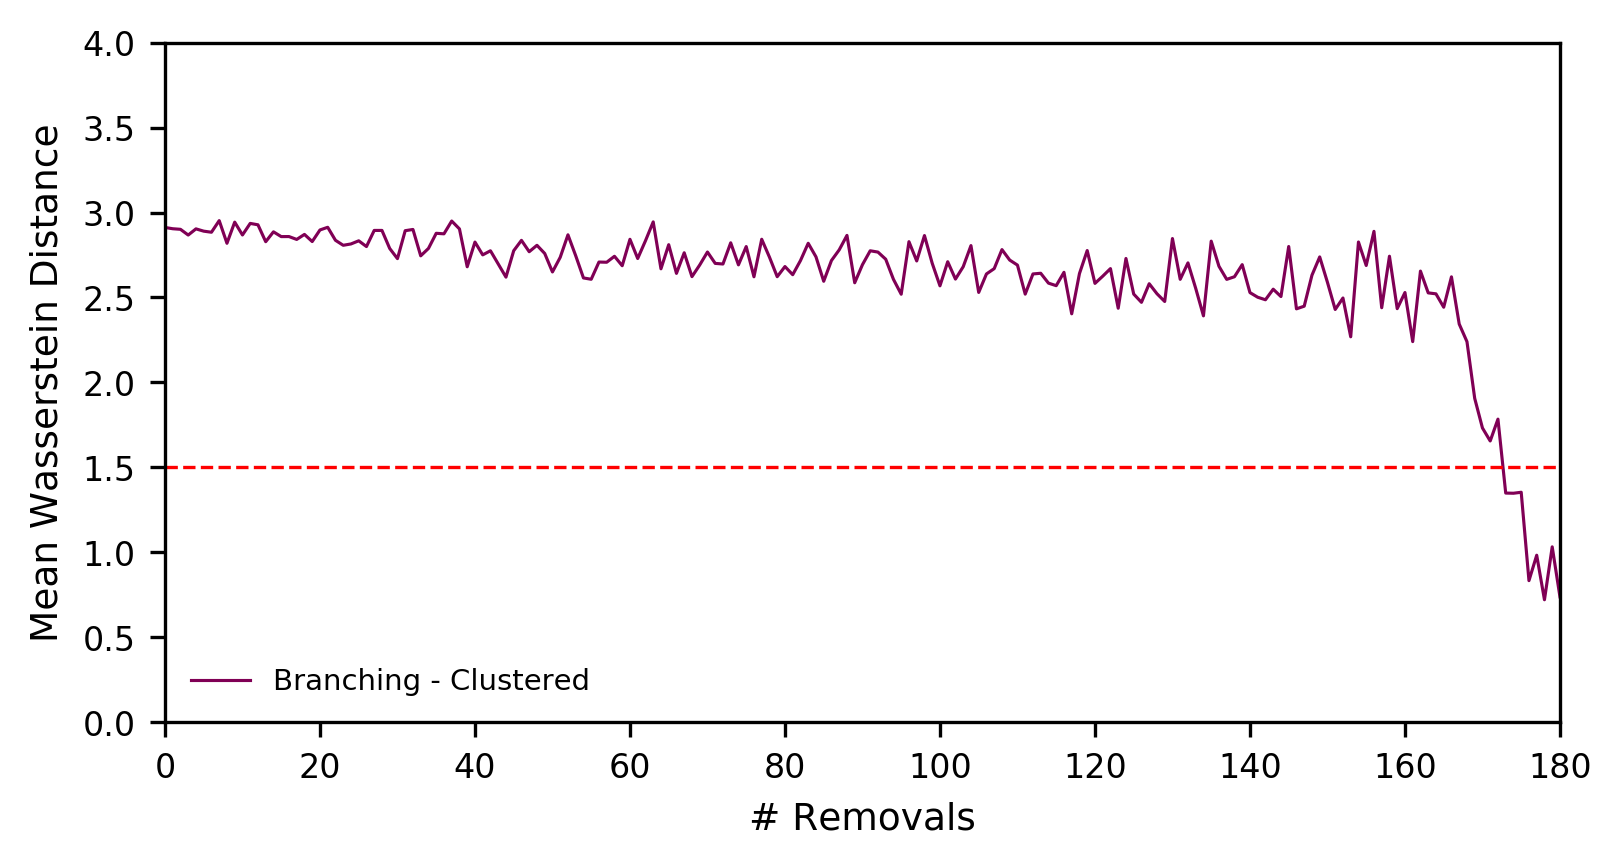

In [19]:
plt.figure(figsize=(6,3), dpi=300)

pair_idx = 0
for cond_pair in cond_pairs_sml:
    
    cond1 = cond_pair[0]
    cond2 = cond_pair[1]

    fname = "removal_wassdist_prolif_" + cond1 + "_" + cond2 + ".npz"
    wass_data = np.load(fname)
    
    mean_wass_dist = wass_data["mean"]
    std_wass_dist = wass_data["std"]
    
    clr = ''
    if cond1 == 'Individual' and cond2 == 'Spanning':
        clr = '#00806b'
    elif cond1 == 'Individual' and cond2 == 'Clustered':
        clr = '#2b0082'
    elif cond1 == 'Spanning' and cond2 == 'Clustered':
        clr = '#800055'
    else:
        clr = 'yellow'

    plt.plot(removals, mean_wass_dist, color=clr, linewidth=0.75, 
             label = label_pairs_sml[pair_idx][0] + " - " + label_pairs_sml[pair_idx][1])
    
    wass_data.close()
    pair_idx += 1

threshold_val = 1.5
plt.plot([0, 180], [threshold_val, threshold_val], "red", linestyle="--", linewidth=0.8)
plt.xlim([0, 180])
plt.ylim([0, 4])
plt.xticks(np.arange(0, 180+20, 20), np.arange(0, 180+20, 20), fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc=3, fontsize=7, frameon=False)
plt.xlabel('# Removals', fontsize=9)
plt.ylabel('Mean Wasserstein Distance', fontsize=9)
plt.show()

#### Spatial scaling

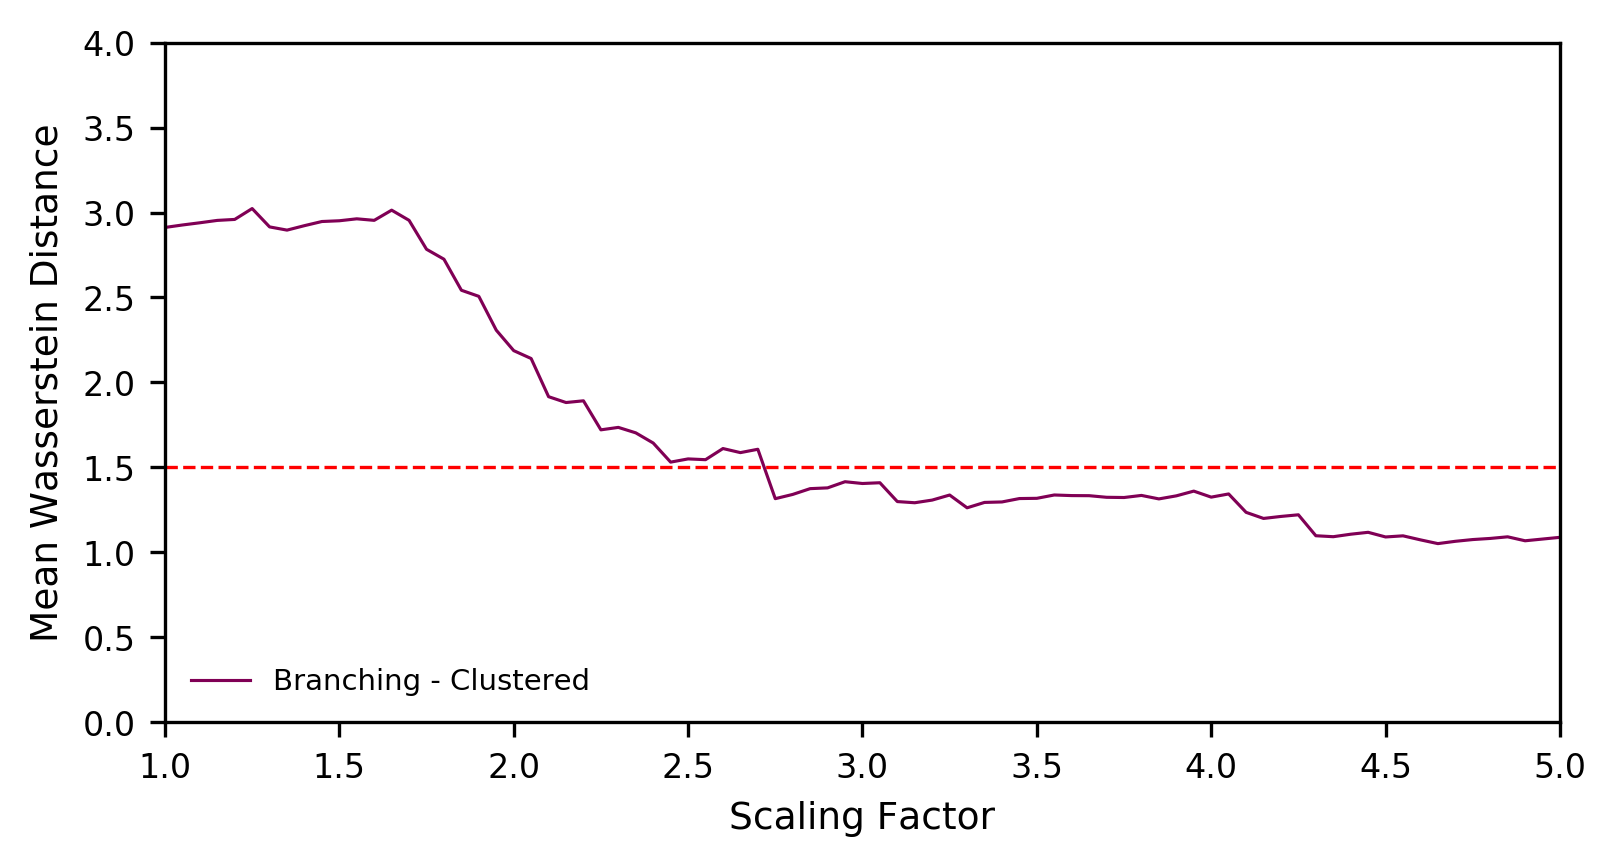

In [37]:
plt.figure(figsize=(6,3), dpi=300)

pair_idx = 0
for cond_pair in cond_pairs_sml:
    
    cond1 = cond_pair[0]
    cond2 = cond_pair[1]

    fname = "scale_wassdist_prolif_" + cond1 + "_" + cond2 + ".npz"
    wass_data = np.load(fname)
    
    mean_wass_dist = wass_data["mean"]
    std_wass_dist = wass_data["std"]
    
    clr = ''
    if cond1 == 'Individual' and cond2 == 'Spanning':
        clr = '#00806b'
    elif cond1 == 'Individual' and cond2 == 'Clustered':
        clr = '#2b0082'
    elif cond1 == 'Spanning' and cond2 == 'Clustered':
        clr = '#800055'
    else:
        clr = 'yellow'
        
    plt.plot(scales[:-1], mean_wass_dist, color=clr, linewidth=0.75, 
             label = label_pairs_sml[pair_idx][0] + " - " + label_pairs_sml[pair_idx][1])
    
    wass_data.close()
    pair_idx += 1

threshold_val = 1.5
plt.plot([1, 5], [threshold_val, threshold_val], "red", linestyle="--", linewidth=0.8)
plt.xlim([1, 5])
plt.ylim([0, 4])
plt.yticks(fontsize=8)
plt.xticks(np.arange(1, 5.5, 0.5), np.arange(1, 5.5, 0.5), fontsize=8)
plt.legend(loc=3, fontsize=7, frameon=False)
plt.xlabel('Scaling Factor', fontsize=9)
plt.ylabel('Mean Wasserstein Distance', fontsize=9)
plt.show()

#### Timelapse

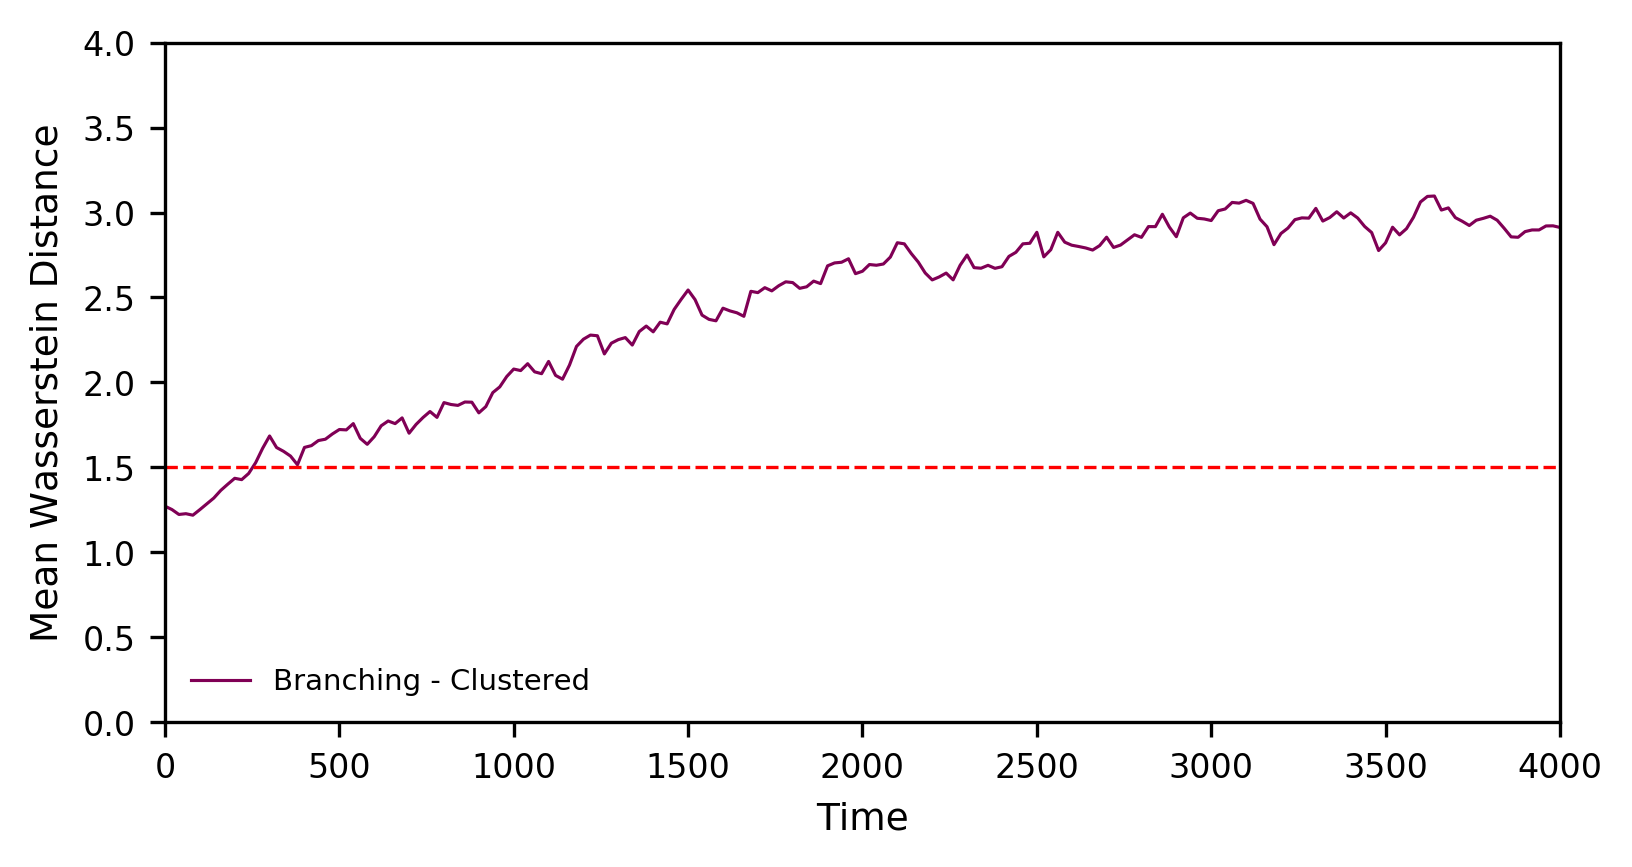

In [38]:
plt.figure(figsize=(6,3), dpi=300)

pair_idx = 0
for cond_pair in cond_pairs_sml:
    
    cond1 = cond_pair[0]
    cond2 = cond_pair[1]

    fname = "timelapse_wassdist_prolif_" + cond1 + "_" + cond2 + ".npz"
    wass_data = np.load(fname)
    
    mean_wass_dist = wass_data["mean"]
    std_wass_dist = wass_data["std"]
    
    clr = ''
    if cond1 == 'Individual' and cond2 == 'Spanning':
        clr = '#00806b'
    elif cond1 == 'Individual' and cond2 == 'Clustered':
        clr = '#2b0082'
    elif cond1 == 'Spanning' and cond2 == 'Clustered':
        clr = '#800055'
    else:
        clr = 'yellow'

    plt.plot(tpoints*0.02, mean_wass_dist, color=clr, linewidth=0.75, 
             label = label_pairs_sml[pair_idx][0] + " - " + label_pairs_sml[pair_idx][1])
    
    wass_data.close()
    pair_idx += 1

threshold_val = 1.5
plt.plot([0, max(tpoints)*0.02], [threshold_val, threshold_val], "red", linestyle="--", linewidth=0.8)
plt.xlim([0, max(tpoints)*0.02])
plt.ylim([0, 4])
plt.yticks(fontsize=8)
plt.xticks(np.arange(0, 4000+500, 500), np.arange(0, 4000+500, 500), fontsize=8)
plt.legend(loc=3, fontsize=7, frameon=False)
plt.xlabel('Time', fontsize=9)
plt.ylabel('Mean Wasserstein Distance', fontsize=9)
plt.show()

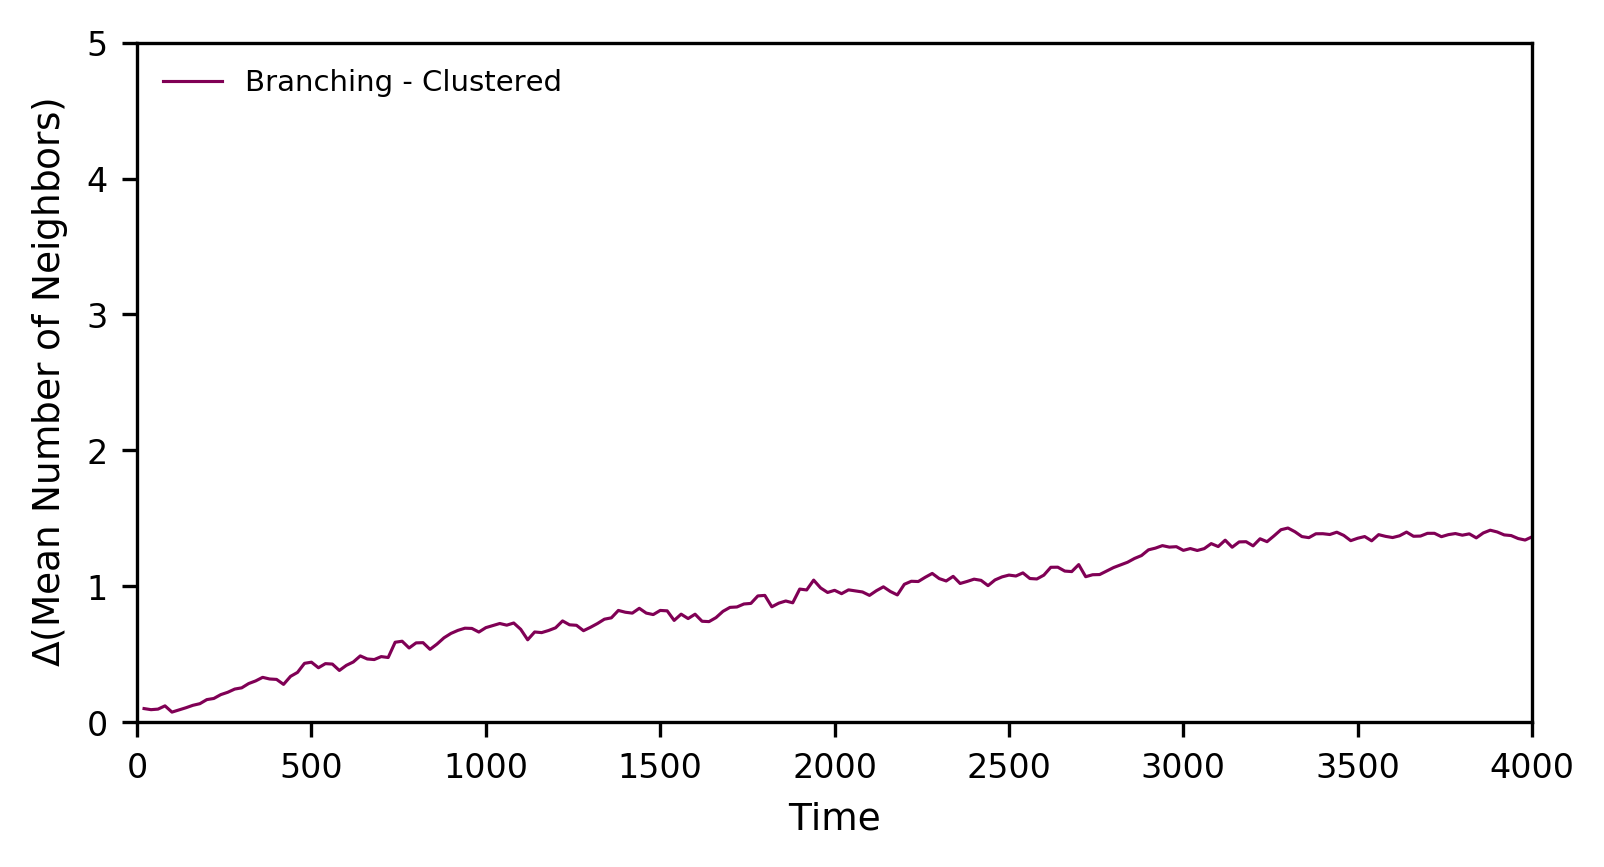

In [39]:
plt.figure(figsize=(6,3), dpi=300)

pair_idx = 0
for cond_pair in cond_pairs_sml:
    
    cond1 = cond_pair[0]
    cond2 = cond_pair[1]
    
    delta_density_per_rep = np.zeros((n_reps, n_tpoints))
    
    for rep in rep_vals:
        
        n_t = 0
        
        for itr in tpoints:
            
            nbd_file = parent_dir + os.sep + cond1 + '_' + repr(rep) + '_rep' + os.sep + 'Neighbors_' + repr(itr).zfill(6) + '.dat'
            infile = open(nbd_file, 'r')
            contents = infile.read().strip().split()
            
            avg_neighbors_cond1 = 0.0
            for num_neighbors in contents:
                avg_neighbors_cond1 += float(num_neighbors)
            avg_neighbors_cond1 = avg_neighbors_cond1/len(contents)
            
            nbd_file = parent_dir + os.sep + cond2 + '_' + repr(rep) + '_rep' + os.sep + 'Neighbors_' + repr(itr).zfill(6) + '.dat'
            infile = open(nbd_file, 'r')
            contents = infile.read().strip().split()
            
            avg_neighbors_cond2 = 0.0
            for num_neighbors in contents:
                avg_neighbors_cond2 += float(num_neighbors)
            avg_neighbors_cond2 = avg_neighbors_cond2/len(contents)
            
            delta_density_per_rep[rep-1, n_t] = abs(avg_neighbors_cond1 - avg_neighbors_cond2)
            
            n_t += 1
            
    avg_density_diff = np.mean(delta_density_per_rep, axis=0)
    std_density_diff = np.std(delta_density_per_rep, axis=0)
    
    clr = ''
    if cond1 == 'Individual' and cond2 == 'Spanning':
        clr = '#00806b'
    elif cond1 == 'Individual' and cond2 == 'Clustered':
        clr = '#2b0082'
    elif cond1 == 'Spanning' and cond2 == 'Clustered':
        clr = '#800055'
    else:
        clr = 'yellow'
    
    plt.plot(tpoints[1:]*0.02, avg_density_diff[1:], color=clr, linewidth=0.75,
            label = label_pairs_sml[pair_idx][0] + " - " + label_pairs_sml[pair_idx][1])
    
    pair_idx += 1

plt.xlim([1, max(tpoints)*0.02])
plt.ylim([0, 5])
plt.legend(loc=2, fontsize=7, frameon=False)
plt.yticks(fontsize=8)
plt.xticks(np.arange(0, 4000+500, 500), np.arange(0, 4000+500, 500), fontsize=8)
plt.xlabel('Time', fontsize=9)
plt.ylabel('$\Delta$(Mean Number of Neighbors)', fontsize=9)
plt.show()